## Identifying and Dealing with Missing Data

In [5]:
import pandas as pd 
from io import  StringIO


In [6]:
csv_data = \
 ''' A, B, C, D 
1.0, 2.0, 3.0, 4.0 
5.0, 6.0,,8.0 
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
## Debug 
print(df.index)

RangeIndex(start=0, stop=3, step=1)


In [8]:
df.isnull().sum()

A     0
B     0
C     1
D     1
dtype: int64

In [9]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

### Eliminate missing values
##### One method for handling missing values is to eliminate the relevant features (in this case columns) entirely. 
##### This can be done using the dropna() in Pandas

In [10]:
# Removing rows that contain missing values
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [11]:
# Removing columns that contain missing values
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [12]:
# Remove columns with missing values
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [13]:
# Selectively dropping rowas where all columns are NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [35]:
# Dropping rows with fewer than 3 real values
df.dropna(thresh=4)


,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


## Imputing Missing Values
#### In cases where dropping columns with missing values is not feasible (e.g. loss of valuable /desired data) Imputation is a method
#### for interpolating missing values. One such imputation method is 
#### *mean imputation* (replacing missing values with the mean value of the entire feature column)

In [15]:
df.values     # the origianl array

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [16]:
from sklearn.impute import SimpleImputer
import numpy as np 

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [17]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## Handling Categorical Data
#### Notes Categorical Data: Can be divided further into *ordinal* and *nominal* features. 
#### Ordinal features are sortable categories (e.g. small, medium, large , or S,M,L) where order can be defined. 
#### Nominal features do not imply any order (e.g. red, green, yellow, blue)

In [18]:
import pandas as pd 

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


## Mapping Ordinal Features
#### To deal with the ordinal features, we essentially need to convert(cast) the string values to integers and map them manually

In [19]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [20]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## Encoding Class Labels
#### It is considered good practice to encode class labels as integer arrays to avoid any potential problems

In [21]:
import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping



{'class1': 0, 'class2': 1}

In [22]:
# convert class labels from strings to integers
df['classlabel'] = df['classlabel'].map(class_mapping)
df



,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [23]:
# reverse the class label mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df



,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


### An alternative method for encoding is  the LabelEncoding implementation in Scikitlearn

In [24]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y



array([1, 0, 1])

In [25]:
# reverse mapping
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

## Perform One-Hot Encoding on Nominal Features
#### In short one-hot encoding is a method to convert categorical variables into binary format (e.g. apples = 0, oranges = 1)
#### or in this implementation, blue =1 , green=0, and red=0
#### Conversion process of converting one value into an artificial "new" feature is sometimes referred to as creating a "dummy-feature"

In [26]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X



array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [27]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [28]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)



array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [29]:
# one-hot encoding via pandas

pd.get_dummies(df[['price', 'color', 'size']])



,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


#### Pandas also provides a *get_dummies()* method, which only converts str columns and leave all other columns unchanged

In [30]:
# multicollinearity guard in get_dummies
# here the drop_first=True parameter results in the first column being dropped

pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)



,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


In [31]:
# multicollinearity guard for the OneHotEncoder

color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)



array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

## Optional Step: Encoding Ordindl Features 
#### Threshold encoding with values of 0/1 can be used if uncertainty regarding numerical 
#### differences between two ordinal features or between two ordinal values is present. 

 
 

In [32]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df



,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


### Using Pandas to write custom Lambda expressions to encode these variables using the 
### value-threshold approach

In [33]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df



,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


## Dataset Partitinoning into Separate Training and Test Sets

In [40]:
df_wine = pd.read_csv('C:/Users/S/_devrepos/Learning_ML/ML_PytorchScikitlearn/Datasets/ch04/wine.data')

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [41]:
from sklearn.model_selection import train_test_split 
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values 
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3,
                     random_state=0,
                     stratify=y)

## Feature Scaling

### One method to ensure that the data is normalized(standardizing the scale for the data features) so that no single feature dominates the dataset due to its magnitude.
### This is done without changing the shape of the distribution, nor does it transform non-normally distributed data into normally distributed data.
### Specfically in *min-max scaling* usually rescales the range for the data between 0 and 1.
### Scikitlearn includes a MinMaxScalar() for this.

In [42]:
from sklearn.preprocessing import MinMaxScaler 

mms = MinMaxScaler() 
X_train_norm = mms.fit_transform(X_train) 
X_test_norm = mms.transform(X_test) 

### Another method included in Scikitlearn is StandardScaler(), which standardizes features by removing the mean and 
### scaling to unit variance.

In [43]:
from sklearn.preprocessing import StandardScaler 

stdsc = StandardScaler() 
X_train_std = stdsc. fit_transform(X_train) 
X_test_std = stdsc.transform(X_test)

### Visual example 

In [44]:
ex = np.array([0, 1, 2, 3, 4, 5]) 
print('Standardized:', (ex - ex.mean()) / ex.std())

print('Normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

Standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
Normalized: [0.  0.2 0.4 0.6 0.8 1. ]


## Selecting Meaningful Features 

### L1 and L2 Regularization as Penalties against Model Complexity

####  In brief, L1 and L2 are methods to prevent overfitting (which can increase variance(low precision) 
#### L1 or "Lasso " Regularization adds the sum of the abs values of a model's coefficients to the loss function , and reduces
#### some coefficients towards a limit of zero. This effectively results in feature selection. 
#### L2 or "Ridge" Regularizaitron adds the sum of the squared values of the model's coefficients to the loss function, but does not reduce some features to zero
#### but rather spreads the influence of individual features across multiple features. This method is advantageous when correlations exist between features.

In [45]:
from sklearn.linear_model import LogisticRegression 
LogisticRegression(penalty='l1')

LogisticRegression(penalty='l1')

### Applying this to the Wine Dataset 

In [59]:
from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OneVsRestClassifier

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')

lr.fit(X_train_std, y_train)
print('Training Accuracy:', lr.score(X_train_std, y_train)) 
print('Test Accuracy:', lr.score(X_test_std, y_test))

Training Accuracy: 1.0
Test Accuracy: 0.9814814814814815


C:\anaconda3\envs\MLPyTorchScikitlearn\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [61]:
lr.intercept_

array([-1.27061556, -1.46077743, -2.24863443])

In [62]:
np.set_printoptions(8)

In [63]:
lr.coef_[lr.coef_!=0].shape

(25,)

In [64]:
lr.coef_

array([[ 1.05096256,  0.30522108,  0.17073655, -0.63966034,  0.        ,
         0.        ,  1.18143652,  0.        ,  0.        ,  0.        ,
         0.        ,  0.68983108,  3.13641601],
       [-1.08549643, -0.5766689 , -0.45736967,  0.08528776, -0.136019  ,
         0.05335381,  0.581225  ,  0.        ,  0.1325747 , -1.98589676,
         0.91414362,  0.        , -2.98984872],
       [ 0.16265147,  0.11485884,  0.34248768,  0.        ,  0.        ,
         0.        , -2.55209055,  0.        ,  0.        ,  1.57956392,
        -0.899895  , -0.40213128,  0.        ]])

C:\anaconda3\envs\MLPyTorchScikitlearn\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\anaconda3\envs\MLPyTorchScikitlearn\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\anaconda3\envs\MLPyTorchScikitlearn\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\anaconda3\envs\MLPyTorchScikitlearn\Lib\site-packages\sklearn\li

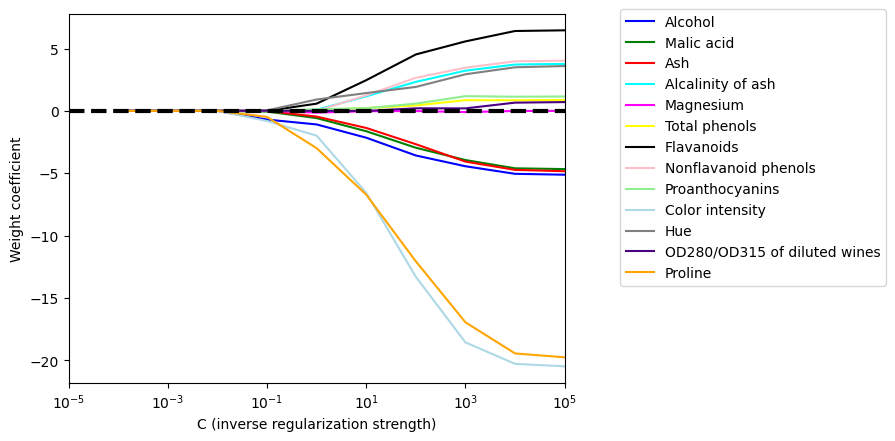

In [65]:
import matplotlib.pyplot as plt 
fig = plt.figure() 
ax = plt.subplot(111) 

colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

plt.show()

## Sequential Feauture Selection Algorithms 

#### Another method to reduce complexity and overfitting is *Dimensionality Reduction*
#### Two methods are:  Feature Selection (which selects a subset of the original features) and Feature Extraction (where information 
#### from the features is derived to create a new feature subset)

In [66]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

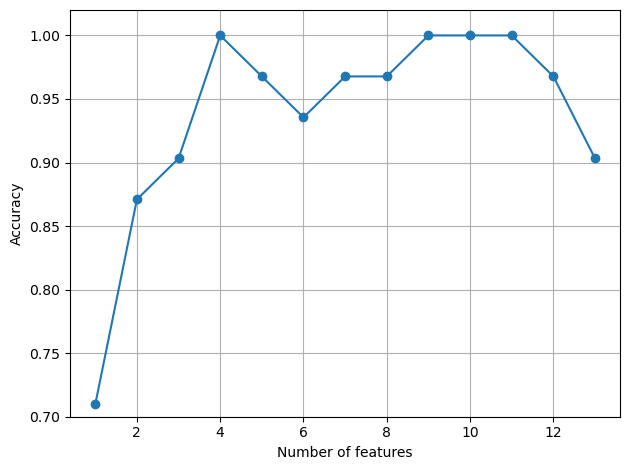

In [67]:


import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()

plt.show()



In [68]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Proanthocyanins', 'Hue', 'Proline'], dtype='object')


In [69]:
knn.fit(X_train_std, y_train)
print('Training Accuracy:', knn.score(X_train_std, y_train))
print('Test Accuracy:', knn.score(X_test_std, y_test))

Training Accuracy: 0.967479674796748
Test Accuracy: 0.9629629629629629


In [70]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.959349593495935
Test accuracy: 0.9074074074074074


## Assessing Feature Importance using Random Forests

 1) Proline                        0.213565
 2) Flavanoids                     0.166822
 3) Color intensity                0.140178
 4) OD280/OD315 of diluted wines   0.121524
 5) Alcohol                        0.109104
 6) Hue                            0.059554
 7) Total phenols                  0.050360
 8) Alcalinity of ash              0.032400
 9) Magnesium                      0.027268
10) Malic acid                     0.025183
11) Proanthocyanins                0.024799
12) Nonflavanoid phenols           0.017587
13) Ash                            0.011656


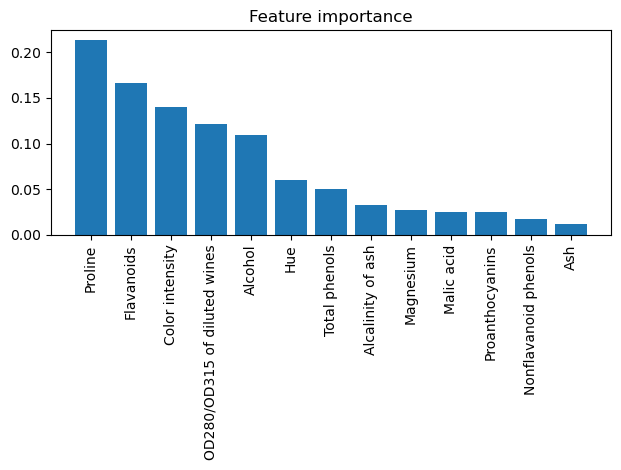

In [71]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

plt.show()

In [72]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5


### Printing the Features that met the threshold criterion for feature selection 

In [73]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.213565
 2) Flavanoids                     0.166822
 3) Color intensity                0.140178
 4) OD280/OD315 of diluted wines   0.121524
 5) Alcohol                        0.109104
